In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import timedelta, datetime


import acquire as ac


import warnings
warnings.filterwarnings("ignore")



In [2]:
df = ac.get_store_data(ac.get_connection)


In [3]:
# df.sample(10000)

In [14]:
df.head()

,item_id,sale_id,store_id,sale_amount,item_brand,item_name,item_price,store_zipcode,store_state,month,dow,sales_total
sale_date,,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,78231,TX,Jan,Tue,10.92
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,78221,TX,Jan,Tue,10.92
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,78232,TX,Jan,Tue,10.92
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,78217,TX,Jan,Tue,10.92
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,78220,TX,Jan,Tue,10.92


# Convert date column to datetime format.

In [5]:
# date time the series created by df.sale_date
df.sale_date = pd.to_datetime(df.sale_date,infer_datetime_format= True)

In [6]:
df.head()

,item_id,sale_id,sale_date,store_id,sale_amount,item_brand,item_name,item_price,store_zipcode,store_state
0,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78231,TX
1,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78221,TX
2,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78232,TX
3,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78217,TX
4,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78220,TX


#  Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

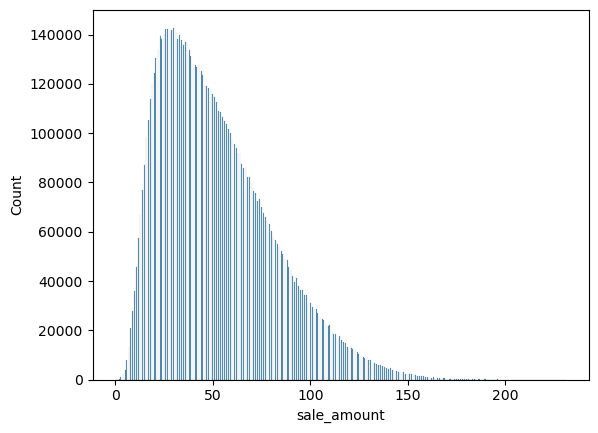

In [7]:
sns.histplot(df.sale_amount)
# plt.title('distribution of sale amount')

<AxesSubplot:xlabel='item_price', ylabel='Count'>

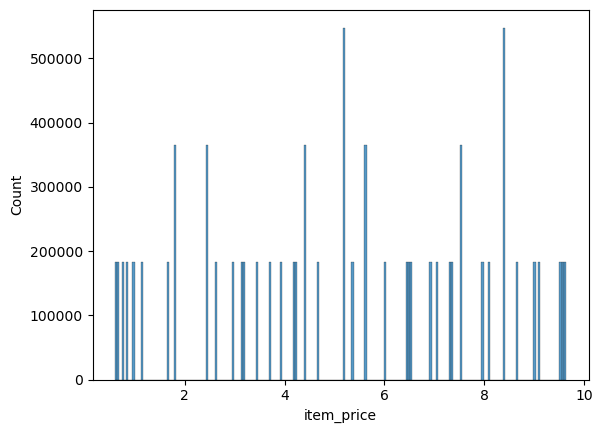

In [8]:
sns.histplot(df.item_price)
# plt.title('distribution of item price')

# Set the index to be the datetime variable.

In [9]:
df = df.set_index('sale_date')

# Add a 'month' and 'day of week' column to your dataframe.

In [10]:
df['month']= df.index.strftime('%b')

In [11]:
df['dow']= df.index.strftime('%a')

# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [13]:
df['sales_total'] = (df.sale_amount * df.item_price)

# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def convert_to_datetime(df):
    df.sale_date = pd.to_datetime(df.sale_date,infer_datetime_format= True)    return df
    return df

In [ ]:
def add_feats(df):
    
    df = df.set_index('sale_date')
    
    df['month']= df.index.strftime('%b')
    
    df['dow']= df.index.strftime('%a')
    
    df['sales_total'] = (df.sales_amount * df.item_price)
    

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [42]:
df = pd.read_csv('opsd_germany_daily.csv')

# Convert date column to datetime format.

In [43]:
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


# Plot the distribution of each of your variables.

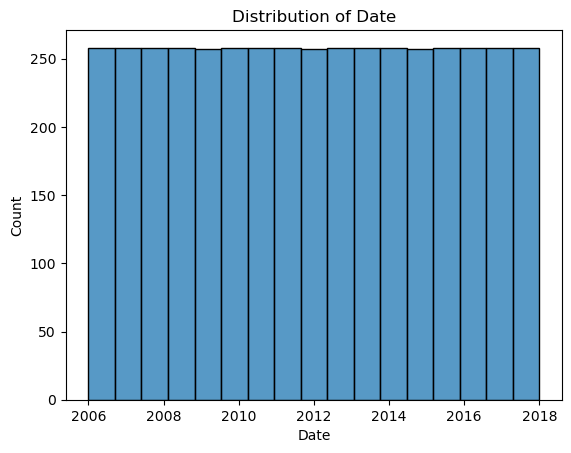

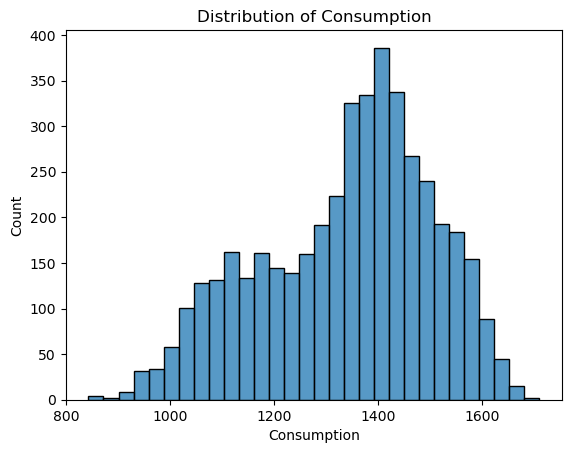

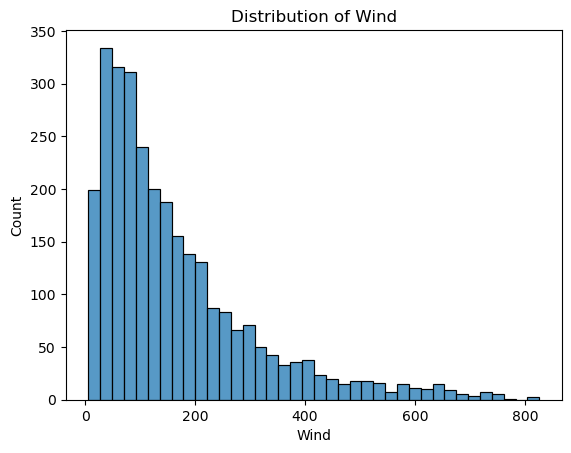

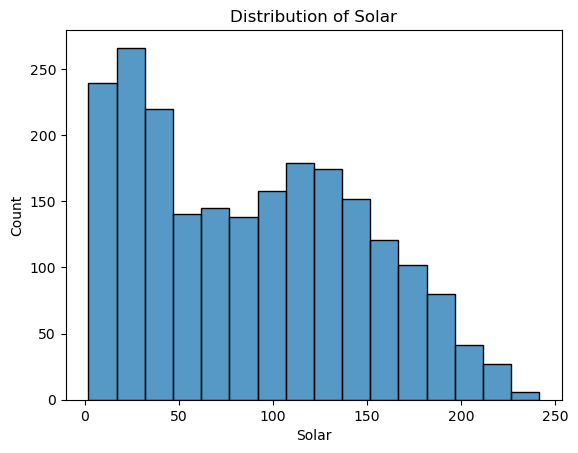

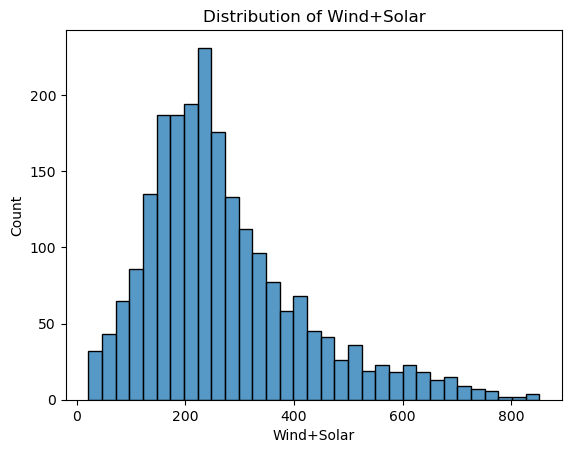

In [46]:
for col in df.columns:
 
    sns.histplot(df[col])
    plt.title('Distribution of {}'.format(col))
    
    plt.show()

# Set the index to be the datetime variable.

In [47]:
df = df.set_index('Date')

# Add a month and a year column to your dataframe.

In [49]:
df['month'] = df.index.strftime('%m')

In [50]:
df['year'] = df.index.strftime('%y')

# Fill any missing values.

In [52]:
df.fillna(0, inplace=True)

# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [53]:
def clean_german(df):
    
    df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)

    df = df.set_index('Date')
    
    # creating features
    df['month'] = df.index.strftime('%m')
    df['year'] = df.index.strftime('%y')
    
    # fill nulls
    df.fillna(0, inplace=True)